In [ ]:
from google.colab import files
uploaded = files.upload()


Saving heart_disease_dataset.csv to heart_disease_dataset.csv


In [ ]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("heart_disease_dataset.csv")

# Display first few rows
print("Dataset Preview:")
display(df.head())

# Define features (X) and target (y)
X = df.drop(columns=['heart_disease'])
y = df['heart_disease']

# Split into training and testing sets (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Display results
print("✅ Data successfully split!")
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("\nTarget distribution in training set:\n", y_train.value_counts(normalize=True))
print("\nTarget distribution in test set:\n", y_test.value_counts(normalize=True))


Dataset Preview:


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,heart_disease
0,58,1,1,134,246,0,0,155,0,0.4,1,1,2,1
1,52,0,2,112,245,0,0,143,1,0.1,0,0,3,1
2,59,0,2,126,196,0,0,162,1,1.1,1,0,1,1
3,67,1,1,165,201,0,0,180,0,0.4,2,0,2,0
4,51,1,0,146,174,1,1,133,1,0.9,1,1,2,1


✅ Data successfully split!
Training set shape: (320, 13)
Testing set shape: (80, 13)

Target distribution in training set:
 heart_disease
1    0.55625
0    0.44375
Name: proportion, dtype: float64

Target distribution in test set:
 heart_disease
1    0.55
0    0.45
Name: proportion, dtype: float64


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Initialize the model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)  # Using unscaled data

# Predict on test data
y_pred = dt_model.predict(X_test)

# Probabilities for ROC-AUC
y_proba = dt_model.predict_proba(X_test)[:, 1]

# Evaluate
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_proba)

# Specificity (True Negative Rate)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)

# Print results
print("Decision Tree Performance:")
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall (Sensitivity): {rec:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC: {roc:.2f}")
print(f"Specificity: {specificity:.2f}")


Decision Tree Performance:
Accuracy: 0.57
Precision: 0.60
Recall (Sensitivity): 0.68
F1-Score: 0.64
ROC-AUC: 0.56
Specificity: 0.44


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Initialize Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Train on unscaled data
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

# Calculate metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_proba)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)

# Print results
print("Random Forest Performance:")
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall (Sensitivity): {rec:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC: {roc:.2f}")
print(f"Specificity: {specificity:.2f}")


Random Forest Performance:
Accuracy: 0.66
Precision: 0.67
Recall (Sensitivity): 0.75
F1-Score: 0.71
ROC-AUC: 0.76
Specificity: 0.56


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression
lr_model = LogisticRegression(random_state=42)

# Train on scaled data
lr_model.fit(X_train_scaled, y_train)

# Predict
y_pred = lr_model.predict(X_test_scaled)
y_proba = lr_model.predict_proba(X_test_scaled)[:,1]

# Calculate metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_proba)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)

# Print results
print("Logistic Regression Performance:")
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall (Sensitivity): {rec:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC: {roc:.2f}")
print(f"Specificity: {specificity:.2f}")


Logistic Regression Performance:
Accuracy: 0.68
Precision: 0.70
Recall (Sensitivity): 0.73
F1-Score: 0.71
ROC-AUC: 0.73
Specificity: 0.61


In [ ]:
from sklearn.svm import SVC

# Initialize SVM
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)  # scaled data

# Predict
y_pred = svm_model.predict(X_test_scaled)
y_proba = svm_model.predict_proba(X_test_scaled)[:,1]

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_proba)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)

# Print results
print("SVM Performance:")
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall (Sensitivity): {rec:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC: {roc:.2f}")
print(f"Specificity: {specificity:.2f}")


SVM Performance:
Accuracy: 0.65
Precision: 0.67
Recall (Sensitivity): 0.70
F1-Score: 0.69
ROC-AUC: 0.74
Specificity: 0.58


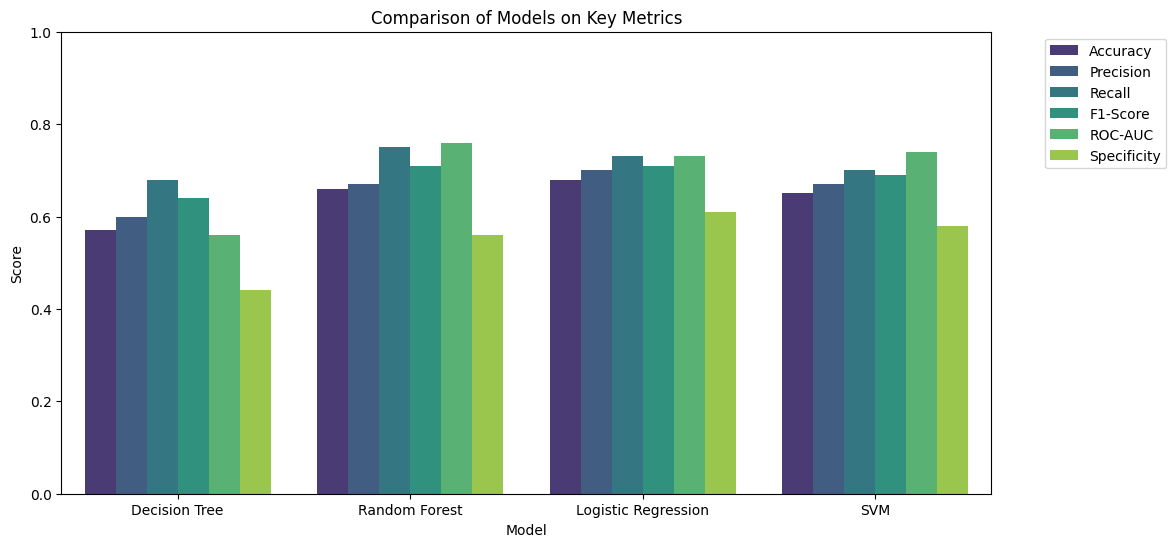

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame
results_df = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest", "Logistic Regression", "SVM"],
    "Accuracy": [0.57, 0.66, 0.68, 0.65],
    "Precision": [0.60, 0.67, 0.70, 0.67],
    "Recall": [0.68, 0.75, 0.73, 0.70],
    "F1-Score": [0.64, 0.71, 0.71, 0.69],
    "ROC-AUC": [0.56, 0.76, 0.73, 0.74],
    "Specificity": [0.44, 0.56, 0.61, 0.58]
})

# Melt for plotting
results_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(12,6))
sns.barplot(data=results_melted, x="Model", y="Score", hue="Metric", palette="viridis")
plt.title("Comparison of Models on Key Metrics")
plt.ylabel("Score")
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
